# Assignment 6
## Due May 28th

## Names:

In [8]:
%matplotlib inline

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_breast_cancer

import os

#Creater a folder for images
path = os.path.dirname(os.path.abspath('Assignment6_bodden.ipynb')) + '\Images'
if not os.path.exists(path):
    os.makedirs(path)

np.random.seed(42)

## Exercise 2

### c)

In [65]:
xs = np.array([[0,0], [1,2], [-1,2]])
ys = [-1, 1, 1]

linearKernelSVM = svm.SVC(kernel='linear')
linearKernelSVM.fit(xs, ys)

print('Optimal parameters are w = {}, b {} and y_i alpha_i = {}'.format(linearKernelSVM.coef_[0], 
                                                                        linearKernelSVM.intercept_, 
                                                                        linearKernelSVM.dual_coef_[0]))

Optimal parameters are w = [3.840000e-04 1.000192e+00], b [-1.000256] and y_i alpha_i = [-0.500096  0.25024   0.249856]


In [66]:
plt.scatter(xs[:,0], xs[:,1], c = ['blue' if y == -1 else 'orange' for y in ys])

### d)

In [68]:
xs = np.array([[0,0], [1,2], [-1,2], [0,0.75], [0, 1.25]])
ys = [-1, 1, 1, -1, 1]

linearKernelSVM = svm.SVC(kernel='linear')
linearKernelSVM.fit(xs, ys)

print('Optimal parameters are w = {}, b {} and y_i alpha_i = {}'.format(linearKernelSVM.coef_[0], 
                                                                        linearKernelSVM.intercept_, 
                                                                        linearKernelSVM.dual_coef_[0]))
plt.scatter(xs[:,0], xs[:,1], c = ['blue' if y == -1 else 'orange' for y in ys])

Optimal parameters are w = [3.2000e-04 9.9984e-01], b [-0.99978667] and y_i alpha_i = [-0.24992 -1.       0.12512  0.1248   1.     ]


## Exercise 3

In [11]:
data, labels = make_classification(n_samples=1000, n_features=30, n_informative=15, n_redundant=2, n_repeated=2, n_classes=2, n_clusters_per_class=2, random_state=42, class_sep=0.5)

### a)

In [12]:
train_num = round(2*len(data)/3)

xs_train = data[:train_num]
ys_train = labels[:train_num]

xs_test = data[train_num:]
ys_test = labels[train_num:]


### b)
Remember iid=False in the GridSearch

In [13]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'auto']}

gaussianKernelSVM = svm.SVC(kernel='rbf') #Default kernel is the rbf/Gaussian, though

grid = GridSearchCV(gaussianKernelSVM, param_grid = parameters, cv = 5, iid = False)
grid.fit(xs_train, ys_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
(best_C, best_gamma) = grid.best_params_.values()
print('Best parameters according to crossvalidation are C = {}, gamma = {}.'.format(best_C, best_gamma))


Best parameters according to crossvalidation are C = 100, gamma = 0.001.


### c)

In [38]:
#Risk in respect to 0-1 loss is simply (1-accuracy):
risk01 = 1- grid.score(xs_test, ys_test)

print('Risk (rounded) in respect to 0-1 loss: {}'.format(risk01.round(4)))

#Custom risk function is a bit more tricky. First we need the prediction
ys_pred = grid.predict(xs_test)

diff = ys_test - ys_pred
custom_risk = np.mean([0.2 if d == 1 else 1.8 if d == -1 else 0 for d in diff])

print('Risk (rounded) in respect to custom loss: {}'.format(custom_risk.round(4)))

Risk (rounded) in respect to 0-1 loss: 0.1321
Risk (rounded) in respect to custom loss: 0.0985


### d)

In [39]:
Cs =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
risk01 = []
custom_risk = []

for c in Cs:
    gaussianKernelSVM = svm.SVC(kernel='rbf', gamma='auto', C = c)
    gaussianKernelSVM.fit(xs_train, ys_train)

    risk01.append(1-gaussianKernelSVM.score(xs_train, ys_train))
    print('Risk (rounded) in respect to 0-1 loss: {} (C = {})'.format(risk01[-1].round(4), c))

    ys_pred = gaussianKernelSVM.predict(xs_train)
    diff = ys_train - ys_pred
    custom_risk.append(np.mean([0.2 if d == 1 else 1.8 if d == -1 else 0 for d in diff]))
    
    print('Risk (rounded) in respect to custom loss: {} (C= {})'.format(custom_risk[-1].round(4), c))
    print()

Risk (rounded) in respect to 0-1 loss: 0.4888 (C = 0.001)
Risk (rounded) in respect to custom loss: 0.0978 (C= 0.001)

Risk (rounded) in respect to 0-1 loss: 0.4888 (C = 0.01)
Risk (rounded) in respect to custom loss: 0.0978 (C= 0.01)

Risk (rounded) in respect to 0-1 loss: 0.4888 (C = 0.1)
Risk (rounded) in respect to custom loss: 0.0978 (C= 0.1)

Risk (rounded) in respect to 0-1 loss: 0.0 (C = 1)
Risk (rounded) in respect to custom loss: 0.0 (C= 1)

Risk (rounded) in respect to 0-1 loss: 0.0 (C = 10)
Risk (rounded) in respect to custom loss: 0.0 (C= 10)

Risk (rounded) in respect to 0-1 loss: 0.0 (C = 100)
Risk (rounded) in respect to custom loss: 0.0 (C= 100)

Risk (rounded) in respect to 0-1 loss: 0.0 (C = 1000)
Risk (rounded) in respect to custom loss: 0.0 (C= 1000)



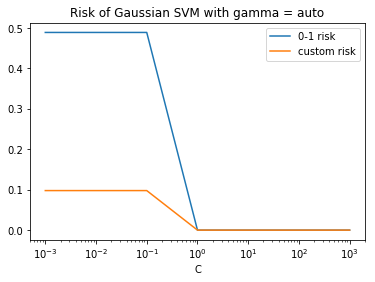

In [40]:
plt.plot(Cs, risk01)
plt.plot(Cs, custom_risk)
plt.legend(['0-1 risk', 'custom risk'])
plt.xscale('log')
plt.xlabel('C')
plt.title('Risk of Gaussian SVM with gamma = auto')

plt.savefig('Images/3d_1.png')

In [41]:
#Now retrain the model with the best gamma and calculate both risks
risk01 = []
custom_risk = []

for c in Cs:
    gaussianKernelSVM = svm.SVC(kernel='rbf', gamma=best_gamma, C = c)
    gaussianKernelSVM.fit(xs_train, ys_train)

    risk01.append(1-gaussianKernelSVM.score(xs_train, ys_train))
    print('Risk (rounded) in respect to 0-1 loss: {} (C = {})'.format(risk01[-1].round(4), c))

    ys_pred = gaussianKernelSVM.predict(xs_train)
    diff = ys_train - ys_pred
    custom_risk.append(np.mean([0.2 if d == 1 else 1.8 if d == -1 else 0 for d in diff]))
    
    print('Risk (rounded) in respect to custom loss: {} (C= {})'.format(custom_risk[-1].round(4), c))
    print()

Risk (rounded) in respect to 0-1 loss: 0.4888 (C = 0.001)
Risk (rounded) in respect to custom loss: 0.0978 (C= 0.001)

Risk (rounded) in respect to 0-1 loss: 0.4888 (C = 0.01)
Risk (rounded) in respect to custom loss: 0.0978 (C= 0.01)

Risk (rounded) in respect to 0-1 loss: 0.3373 (C = 0.1)
Risk (rounded) in respect to custom loss: 0.3169 (C= 0.1)

Risk (rounded) in respect to 0-1 loss: 0.2459 (C = 1)
Risk (rounded) in respect to custom loss: 0.2219 (C= 1)

Risk (rounded) in respect to 0-1 loss: 0.1064 (C = 10)
Risk (rounded) in respect to custom loss: 0.1172 (C= 10)

Risk (rounded) in respect to 0-1 loss: 0.0195 (C = 100)
Risk (rounded) in respect to custom loss: 0.0183 (C= 100)

Risk (rounded) in respect to 0-1 loss: 0.0 (C = 1000)
Risk (rounded) in respect to custom loss: 0.0 (C= 1000)



In [42]:
plt.plot(Cs, risk01)
plt.plot(Cs, custom_risk)
plt.legend(['0-1 risk', 'custom risk'])
plt.xscale('log')
plt.xlabel('C')
plt.title('Risk of Gaussian SVM with gamma = {}'.format(best_gamma))

plt.savefig('Images/3d_2.png')

### e)

In [20]:
X, Y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=42, class_sep=0.75)
X_train, Y_train = X[:120], Y[:120]
X_test, Y_test = X[120:], Y[120:]

In [21]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.01, 0.1, 'auto']}

models = [svm.SVC(kernel='rbf'),
          svm.SVC(kernel='linear'),
          svm.SVC(kernel='poly', degree = 2),
          svm.SVC(kernel='poly', degree = 3)]
grids = []

for m in models:
    print('Starting {} kernel training'.format(m.kernel))
    grids.append(GridSearchCV(m, param_grid = parameters, cv = 5, iid = False))
    grids[-1].fit(X_train, Y_train)
    
    (best_C, best_gamma) = grids[-1].best_params_.values()
    print('Best parameters according to crossvalidation are C = {}, gamma = {}.'.format(best_C, best_gamma))
    print('Score (rounded): {}'.format(grids[-1].score(X_test, Y_test).round(4)))
    print('#############################')

Starting rbf kernel training
Best parameters according to crossvalidation are C = 0.1, gamma = auto.
Score (rounded): 0.7625
#############################
Starting linear kernel training
Best parameters according to crossvalidation are C = 0.1, gamma = 0.001.
Score (rounded): 0.7
#############################
Starting poly kernel training
Best parameters according to crossvalidation are C = 0.1, gamma = auto.
Score (rounded): 0.4875
#############################
Starting poly kernel training
Best parameters according to crossvalidation are C = 1, gamma = auto.
Score (rounded): 0.625
#############################


### f)

In [22]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

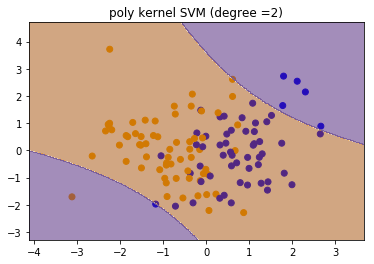

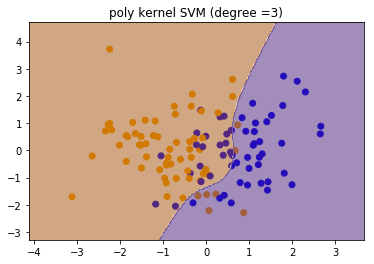

In [23]:
for g in grids:
    plt.scatter(X_train[:,0], X_train[:,1], c=['blue' if y == 1 else 'orange' for y in Y_train])
    
    xx, yy = make_meshgrid(X_train[:,0], X_train[:,1])
    plot_contours(g, xx, yy, cmap=plt.cm.PuOr, alpha=0.5)
    
    title = '{} kernel SVM'.format(g.estimator.kernel)
    savepath = '{}'.format(g.estimator.kernel)
    
    if g.estimator.kernel == 'poly':
        title += ' (degree ={})'.format(g.estimator.degree) 
        savepath += '_deg{}'.format(g.estimator.degree)
    
    plt.title(title)
    
    plt.savefig('Images/3f_{}.png'.format(savepath))
    plt.show()